# A Different Data Source
Due to some limitations/bugs in the current version of MetPy, the best way to deal with real-time GFS forecasts is to access data from a THREDDS server. I have provided a function in the `synoptic` module to take care of this. Let's plot 500-mb heights using a current GFS forecast on a 1 degree global lat/lon grid. (This corresponds to the gfs003 set of GEMPAK files on cat5.)

## Imports

In [1]:
import sys
sys.path.append('/home/decker/lab433')

from synoptic import get_gfs1deg

from datetime import datetime, timedelta

from metpy.units import units
from metpy.plots import ContourPlot, MapPanel, PanelContainer

import matplotlib.pyplot as plt

## Get the Data

In [2]:
user_str = input("Please insert the GFS cycle you want to see as YYMMDDHH:")
fcst_str = input("What forecast hour would you like?:")

Please insert the GFS cycle you want to see as YYMMDDHH: 24092512
What forecast hour would you like?: 12


In [3]:
def str2datetime(s):
    yr = 2000 + int(s[:2])
    mth = int(s[2:4])
    day = int(s[4:6])
    hr = int(s[6:])
    return datetime(yr, mth, day, hr)

In [4]:
#init_time = datetime(2024, 9, 18, 6)
init_time = str2datetime(user_str)
forecast_hr = int(fcst_str)
plot_time = init_time + timedelta(hours = forecast_hr)
gfs = get_gfs1deg(init_time, plot_time)

In [5]:
gfs

Magnitude,[[3000.0 0.0]]
Units,pascal
Magnitude,[[0.4399999976158142 1.0]]
Units,stefan_boltzmann_constant
Magnitude,[[18000.0 0.0]]
Units,pascal
Magnitude,[[[[97.80000305175781 97.80000305175781 97.80000305175781 ... 97.80000305175781 97.80000305175781 97.80000305175781] [96.4000015258789 96.30000305175781 96.19999694824219 ... 96.80000305175781 96.69999694824219 96.5] [96.9000015258789 96.80000305175781 96.69999694824219 ... 97.19999694824219 97.0999984741211 97.0999984741211] ... [79.30000305175781 79.19999694824219 79.19999694824219 ... 79.5999984741211 79.5 79.30000305175781] [80.19999694824219 79.9000015258789 80.0 ... 80.9000015258789 80.69999694824219 80.4000015258789] [82.0 82.0 82.0 ... 82.0 82.0 82.0]]]]
Units,percent
Magnitude,[[[8878.7421875 8878.7421875 8878.7421875 ... 8878.7421875 8878.7421875 8878.7421875] [9721.5419921875 9723.5419921875 9722.9423828125 ... 9716.341796875 9717.9423828125 9719.7421875] [12559.9423828125 12520.9423828125 12487.5419921875 ... 12561.5419921875 12570.341796875 12579.9423828125] ... [6250.142578125 6257.142578125 6264.142578125 ... 6224.3427734375 6233.74267578125 6242.74267578125] [5151.54248046875 5144.9423828125 5140.54248046875 ... 5171.74267578125 5164.142578125 5157.9423828125] [11772.142578125 11772.142578125 11772.142578125 ... 11772.142578125 11772.142578125 11772.142578125]]]
Units,meter
Magnitude,[[[-0.0025390624068677425 -0.0025390624068677425 -0.0025390624068677425 ... -0.0025390624068677425 -0.0025390624068677425 -0.0025390624068677425] [-0.0025390624068677425 -0.0025390624068677425 -0.0025390624068677425 ... -0.0025390624068677425 -0.0025390624068677425 -0.0025390624068677425] [-0.0025390624068677425 -0.1025390625 -0.1025390625 ... -0.0025390624068677425 -0.0025390624068677425 -0.0025390624068677425] ... [-0.0025390624068677425 -0.0025390624068677425 -0.0025390624068677425 ... -0.0025390624068677425 -0.0025390624068677425 -0.0025390624068677425] [-0.0025390624068677425 -0.0025390624068677425 -0.0025390624068677425 ... -0.0025390624068677425 -0.0025390624068677425 -0.0025390624068677425] [-0.0025390624068677425 -0.0025390624068677425 -0.0025390624068677425 ... -0.0025390624068677425 -0.0025390624068677425 -0.0025390624068677425]]]


In [6]:
ht500 = gfs['Geopotential_height_isobaric'].metpy.sel(vertical=500*units('hPa'))

## Make the plot
This is just a copy/paste from example 1, except the area is much larger (taking advantage of global data).  The only steps that changed were the imports and the process of getting the data we needed.

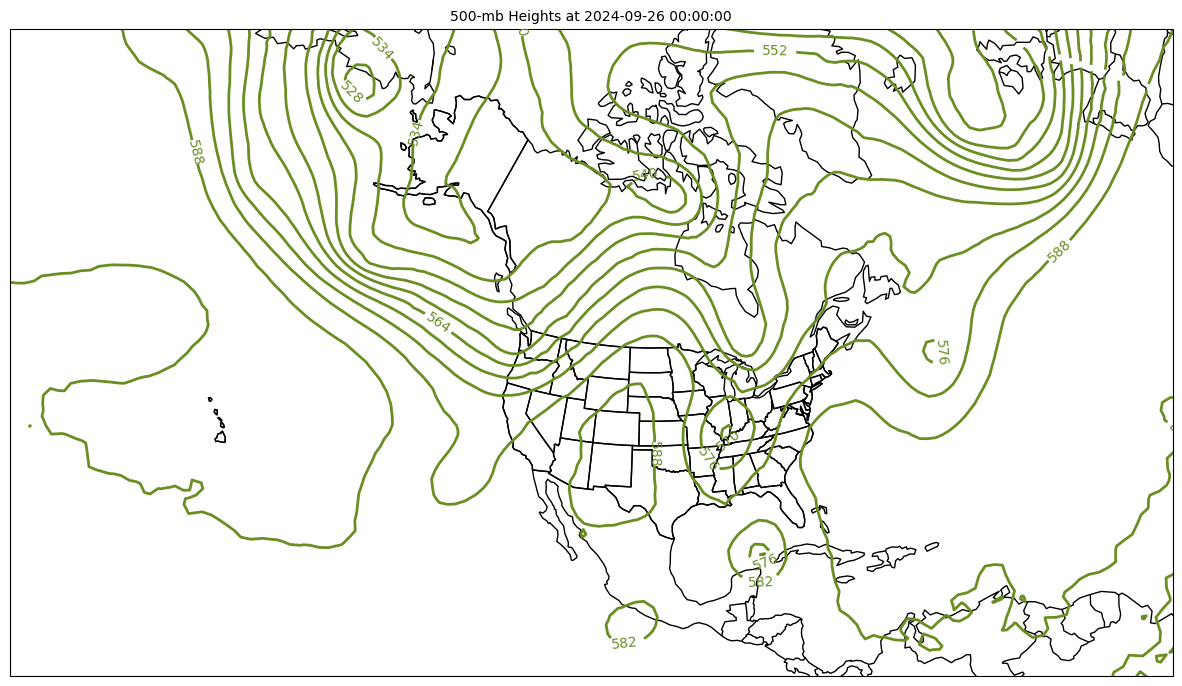

In [7]:
cp = ContourPlot()
cp.data = ht500
cp.time = plot_time
cp.contours = list(range(0, 700, 6))
cp.linecolor = 'olivedrab'
cp.linestyle = 'solid'
cp.clabels = True
cp.plot_units = 'dam'

panel = MapPanel()
panel.area = [-180, -40, 10, 75]
panel.projection = 'lcc'
panel.layers = ['states', 'coastline', 'borders']
panel.title = f'500-mb Heights at {plot_time}'
panel.plots = [cp]

pc = PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]
pc.show()

## Xarray can do calculations, too!

`mpcalc` provides a number of diagnostic functions specific to meteorological analysis, but sometimes, the calculation we may want to do is less specialized. In those cases, we can call upon Xarray functionality directly. Here, we use the `mean()` method which all `DataArray`s have access to.

In [8]:
zonal_mean = ht500.mean(dim='longitude', keep_attrs=True)
zonal_mean

Magnitude,[[5405.49560546875 5405.68896484375 5405.93701171875 5404.4853515625 5402.57861328125 5400.00341796875 5398.23681640625 5397.45751953125 5396.96826171875 5395.10205078125 5392.70849609375 5391.86474609375 5392.12255859375 5392.9189453125 5395.74462890625 5399.7744140625 5404.2744140625 5408.1162109375 5410.9658203125 5414.71826171875 5418.91259765625 5422.89111328125 5426.63818359375 5431.009765625 5436.1201171875 5442.39599609375 5449.1806640625 5456.60791015625 5464.3818359375 5473.09423828125 5483.2861328125 5494.048828125 5506.1416015625 5519.1220703125 5532.15087890625 5544.84033203125 5557.60546875 5570.888671875 5585.10498046875 5600.47705078125 5616.65576171875 5633.94287109375 5652.1328125 5671.2822265625 5691.8046875 5712.4287109375 5732.86376953125 5752.63623046875 5771.8466796875 5790.076171875 5806.77880859375 5821.390625 5834.56884765625 5846.55712890625 5857.65966796875 5867.6513671875 5876.4404296875 5883.4658203125 5888.65576171875 5891.8349609375 5893.7734375 5894.55810546875 5894.49853515625 5894.1279296875 5893.52099609375 5892.7265625 5891.6103515625 5890.21826171875 5889.34326171875 5888.1279296875 5886.82373046875 5885.1748046875 5883.154296875 5880.875 5879.05615234375 5877.65771484375 5876.69384765625 5876.09521484375 5875.35546875 5874.83251953125 5874.1650390625 5873.52099609375 5872.845703125 5872.2109375 5871.52294921875 5870.92626953125 5870.4873046875 5870.138671875 5869.9501953125 5869.77490234375 5869.841796875 5870.33203125 5870.85986328125 5871.3623046875 5871.97412109375 5872.7265625 5873.5625 5874.501953125 5875.48193359375 5876.04736328125 5876.3779296875 5876.72216796875 5877.0380859375 5877.03759765625 5876.46875 5875.57080078125 5874.30126953125 5872.5361328125 5870.03271484375 5866.64453125 5862.29296875 5856.978515625 5850.68798828125 5842.93603515625 5834.03759765625 5823.89404296875 5812.93701171875 5801.0673828125 5788.3974609375 5775.05078125 5761.185546875 5746.43798828125 5730.65966796875 5714.33251953125 5697.85888671875 5681.6123046875 5664.9814453125 5648.30029296875 5631.40283203125 5613.8896484375 5595.0859375 5574.7724609375 5553.07861328125 5530.61328125 5506.8505859375 5481.9990234375 5455.50537109375 5427.1787109375 5398.205078125 5369.162109375 5341.185546875 5314.09326171875 5286.4208984375 5257.552734375 5228.71630859375 5201.3671875 5175.2216796875 5150.8310546875 5128.1796875 5107.6044921875 5088.2685546875 5070.50341796875 5053.40625 5036.78564453125 5022.21142578125 5010.92138671875 5002.27685546875 4994.73876953125 4987.939453125 4981.31396484375 4975.57666015625 4971.49169921875 4969.0029296875 4967.7763671875 4968.97900390625 4972.8232421875 4978.376953125 4982.1748046875 4983.7119140625 4981.54833984375 4975.7978515625 4967.9775390625 4960.9375 4956.07275390625 4952.80224609375 4949.96875 4947.99609375 4947.3271484375 4947.47509765625 4948.34912109375 4948.99560546875]]
Units,meter


<function matplotlib.pyplot.show(close=None, block=None)>

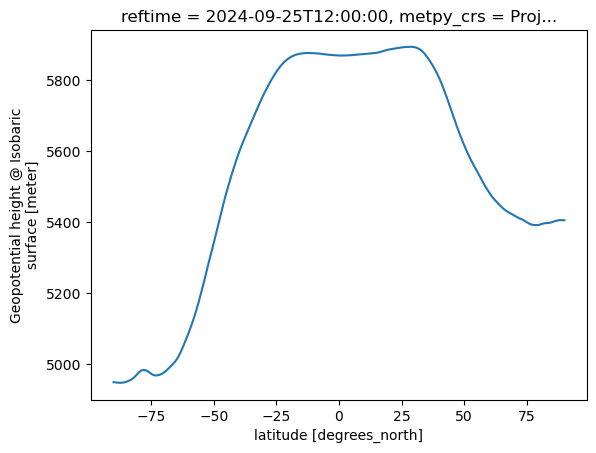

In [9]:
# There is no MetPy interface for a line plot, so we use xarray instead for a quick plot:
zonal_mean.plot()
plt.show